## Generate prediction using ARIMA model

In [1]:


import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')


In [11]:
train_df = pd.read_csv('../../../data/main_data/final.csv')
train_df.head()

,index,formal_date,quarter,date,day_of_week,month,Suspected_Local,Suspected_Foreign,temp,humidity,sun_hours,province,neir_infected_cases,locked_percn,TotalInfected
0,1,2020-03-31,1,31,1,3,41,1,28.5,81.0,7.15,1,34,1.0,11
1,25,2020-03-31,1,31,1,3,0,0,30.0,78.0,6.15,9,1,1.0,0
2,24,2020-03-31,1,31,1,3,0,0,29.5,82.0,5.74,9,1,1.0,0
3,23,2020-03-31,1,31,1,3,0,0,30.0,81.0,4.58,9,0,1.0,0
4,22,2020-03-31,1,31,1,3,0,0,31.0,81.0,4.87,9,1,1.0,0


In [12]:
class Arima:

    def __init__(self,dataset):
        self.df = dataset.copy()
        self.pdq_dist = []
        self.predictions = []

    def train(self):
        for i in range(1,26):
            res = self.arima(i)
            print(res)
            self.predictions.append(res[0])
            self.pdq_dist.append(res[1])
        return self.predictions,self.pdq_dist
            
    def custom_train(self):
        return self.pdq_dist

    def roll(self,district):
        tmp_df = self.df.loc[self.df['index'] == district]
        tmp_df = tmp_df.loc[:,['formal_date','TotalInfected']]
        tmp_df = tmp_df.set_index('formal_date')
        tmp_df.astype('int64')
        res_df = tmp_df.rolling(window=4,center=False).mean().dropna()
        return res_df

    #Mean absolute percentage error.
    def mape(self,y1,y_pred):
        y1, y_pred = np.array(y1), np.array(y_pred)
        return np.mean(np.abs((y1 - y_pred) / y1)) * 100


    #Arima modeling for ts
    def arima(self,district,params = (0,0,0),st=7):
        ts = self.roll(district)
        p=d=q=range(0,6)
        a=99999
        pdq=list(itertools.product(p,d,q))
        #Determining the best parameters
        if(params == (0,0,0)):
            for var in pdq:
                try:
                    model = ARIMA(ts, order=var)
                    result = model.fit()
    
                    if (result.aic<=a) :
                        a=result.aic
                        param=var
                except:
                    continue

        #Modeling
        model = ARIMA(ts, order=param)
        result = model.fit()
        result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
        pred=result.forecast(steps=st)[0]
        #Plotting results
        f,ax=plt.subplots()
        plt.plot(pred,c='green', label= 'predictions')
        #plt.plot(test, c='red',label='real values')
        plt.legend()
        plt.title('True vs predicted values')
        #Printing the error metrics
        print(result.summary())

        #print('\nMean absolute percentage error: %f'%self.mape(test,pred))
        return result.forecast(steps=1)[0],params

                             ARIMA Model Results                              
Dep. Variable:        D.TotalInfected   No. Observations:                  206
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 -54.371
Method:                       css-mle   S.D. of innovations              0.309
Date:                Mon, 02 Nov 2020   AIC                            120.742
Time:                        11:21:07   BIC                            140.709
Sample:                             1   HQIC                           128.817
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1332      0.122      1.096      0.273      -0.105       0.371
ar.L1.D.TotalInfected     0.3171      0.072      4.434      0.000       0.177       0.457
ma.L1.D.

UnboundLocalError: local variable 'param' referenced before assignment

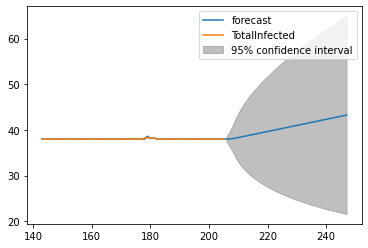

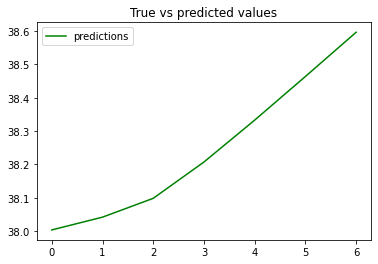

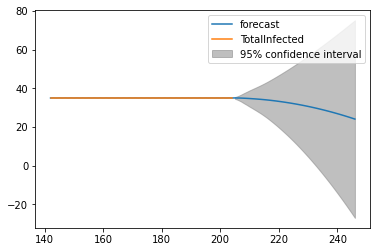

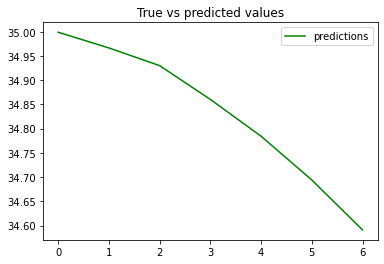

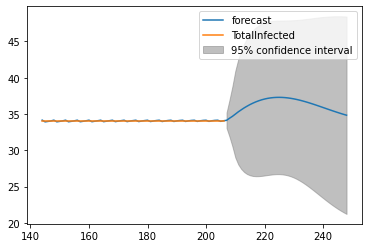

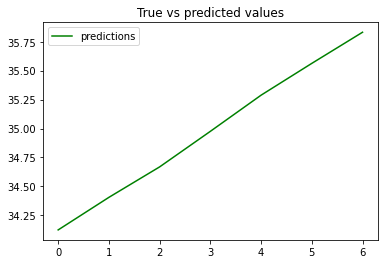

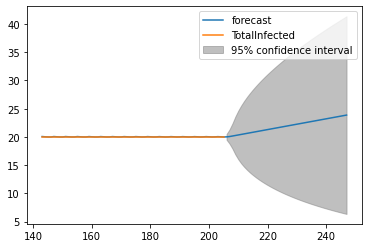

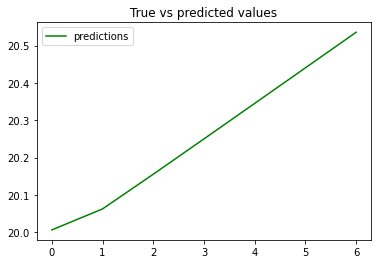

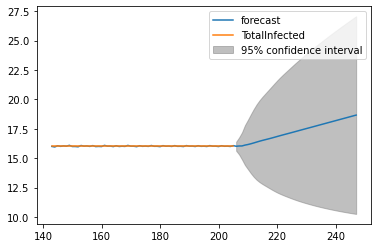

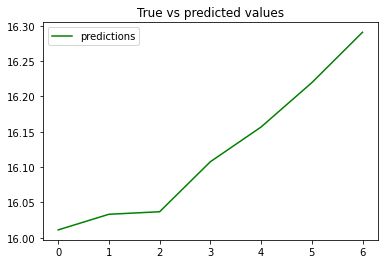

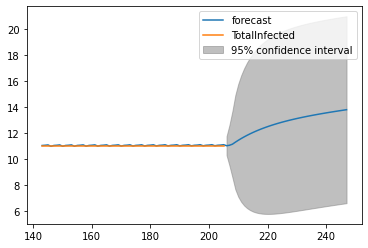

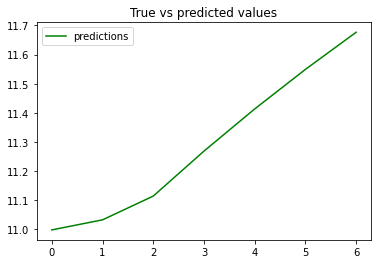

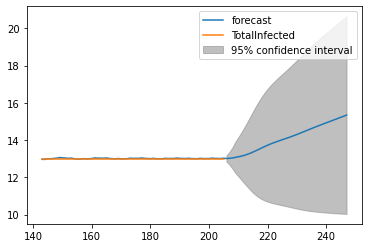

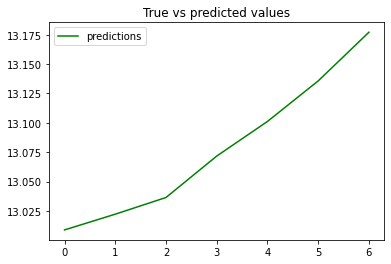

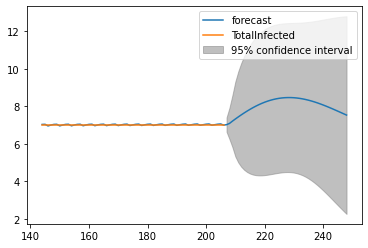

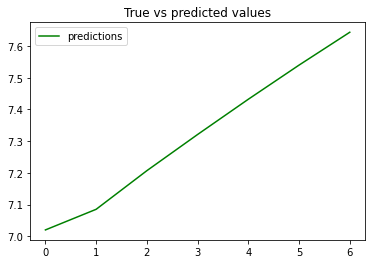

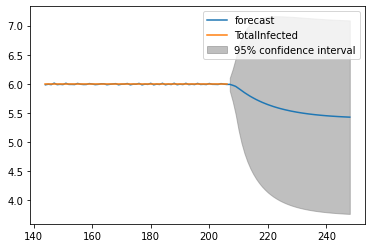

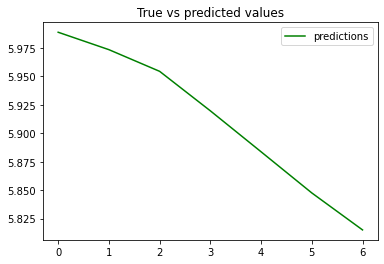

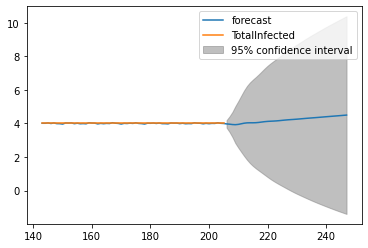

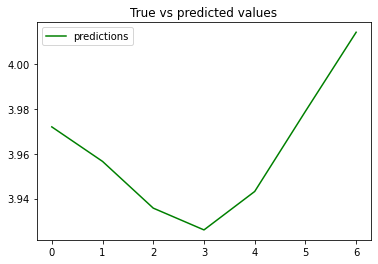

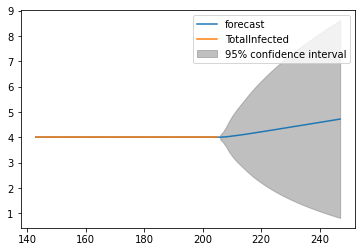

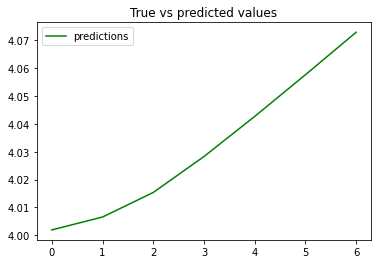

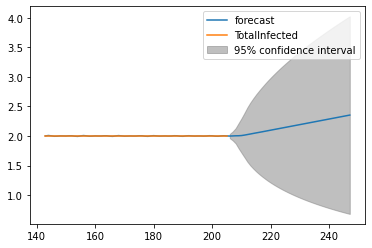

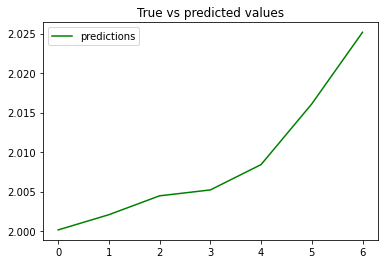

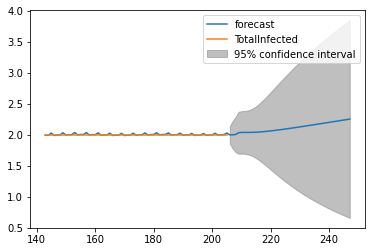

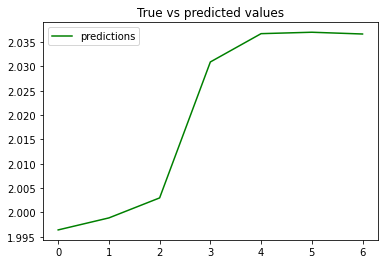

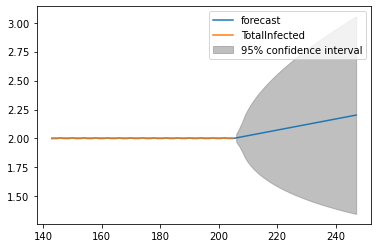

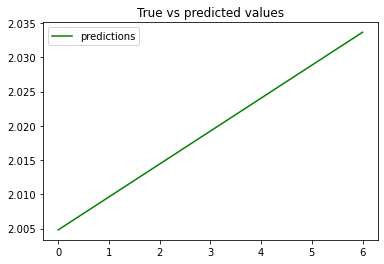

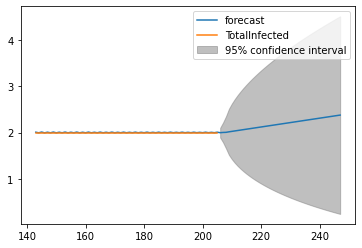

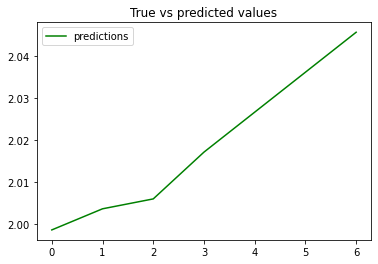

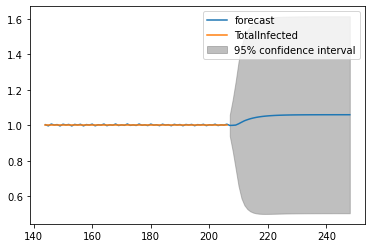

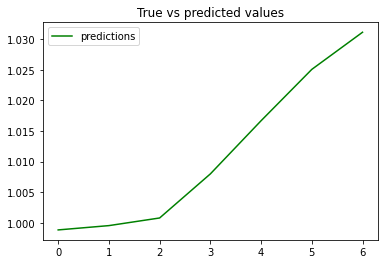

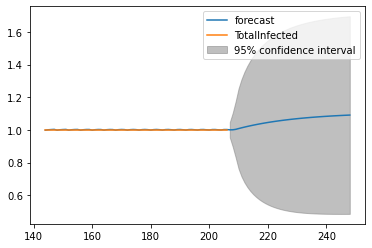

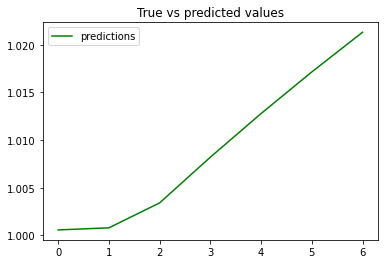

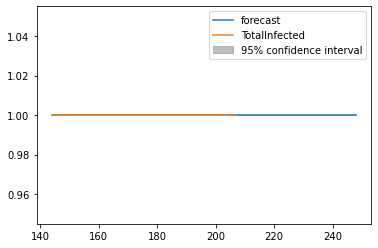

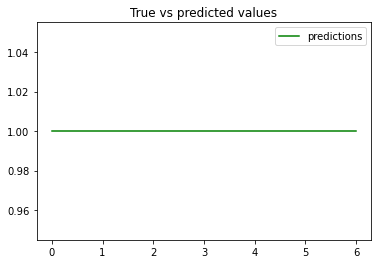

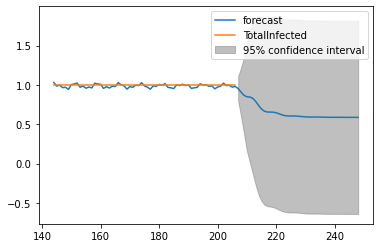

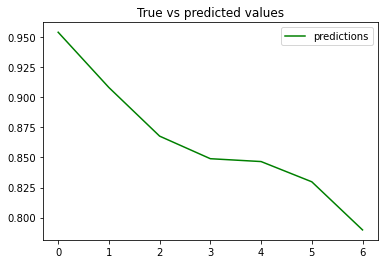

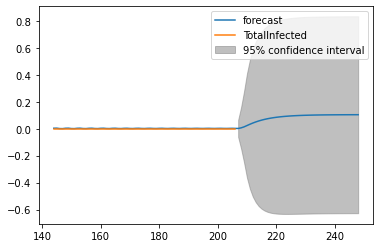

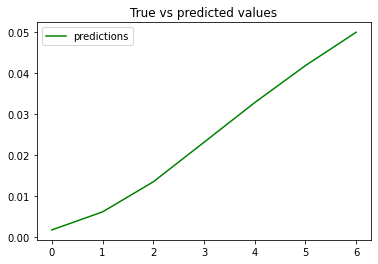

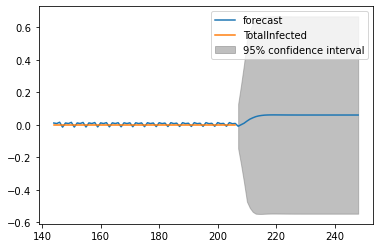

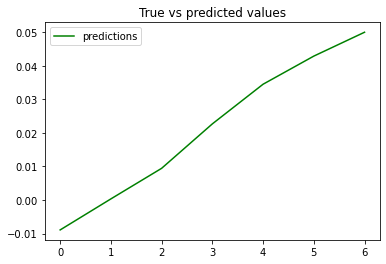

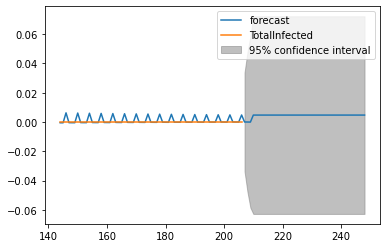

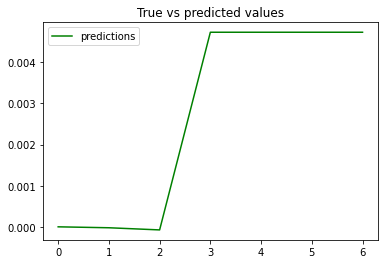

In [13]:
arima_test = Arima(train_df)
res = arima_test.train()

In [ ]:
# val = arima_test.custom_train()